# Final Project - Computational Tools for Data Science


In [24]:
import pandas as pd

import matplotlib.pyplot as plt



In [29]:
file_path = r'C:\Users\Birkir\Desktop\DTU Haust 24\Computational Tools for Data Science\lokaverkefni\02807_final_project\data\fake reviews dataset.csv'

df = pd.read_csv(file_path)

df

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1,CG,I liked nothing about this dress. The only rea...


In [31]:
num_unique_categories = df['category'].nunique()

category_counts = df['category'].value_counts()

category_counts



category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

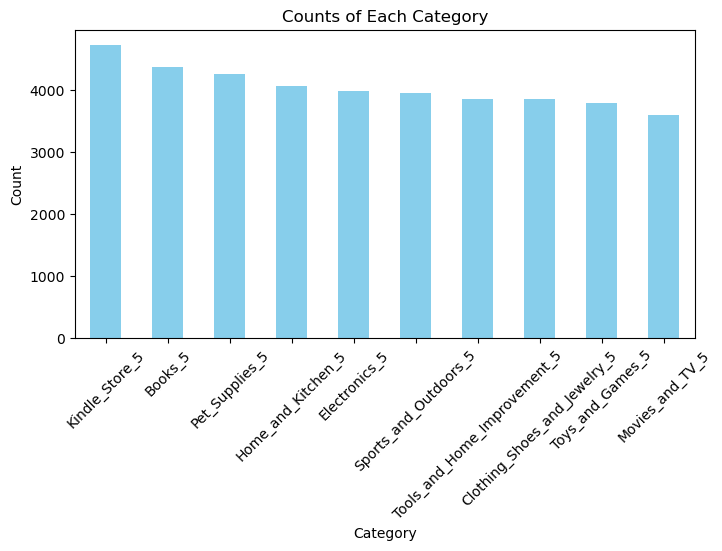

In [28]:
# Plotting the category counts as a bar chart
plt.figure(figsize=(8, 4))  # Set the figure size
category_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [33]:
num_unique_rating = df['rating'].nunique()

rating_counts = df['rating'].value_counts()

rating_counts

rating
5    24559
4     7965
3     3786
1     2155
2     1967
Name: count, dtype: int64

In [35]:
label_counts = df['label'].value_counts()
label_counts

label
CG    20216
OR    20216
Name: count, dtype: int64

In [39]:
# Filter rows where category is 'Electronics_5' and rating = 5
electronics_5_df = df[(df['category'] == 'Electronics_5') & (df['rating'] == 5)]

# Display the filtered DataFrame
electronics_5_df

,category,rating,label,text_
8002,Electronics_5,5,CG,Easy to install even without a power supply. ...
8004,Electronics_5,5,CG,The product is the one that will make you feel...
8005,Electronics_5,5,CG,"Adorable. Plastic not best, but the quality i..."
8007,Electronics_5,5,CG,Great cables. They are working great. The only...
8009,Electronics_5,5,CG,"Seems great, so far. Have not had any issues w..."
...,...,...,...,...
11981,Electronics_5,5,OR,This review is for the charger purchased for a...
11984,Electronics_5,5,CG,We were provided a router that has the same IP...
11985,Electronics_5,5,OR,This is the camera that DxO Labs gave the foll...
11987,Electronics_5,5,OR,I have owned one of these for some time and re...


# Review length analysis
Fake reviews are often short and may lack specific details. You can start by analyzing the length of the reviews (i.e., the number of characters or words) to identify patterns.

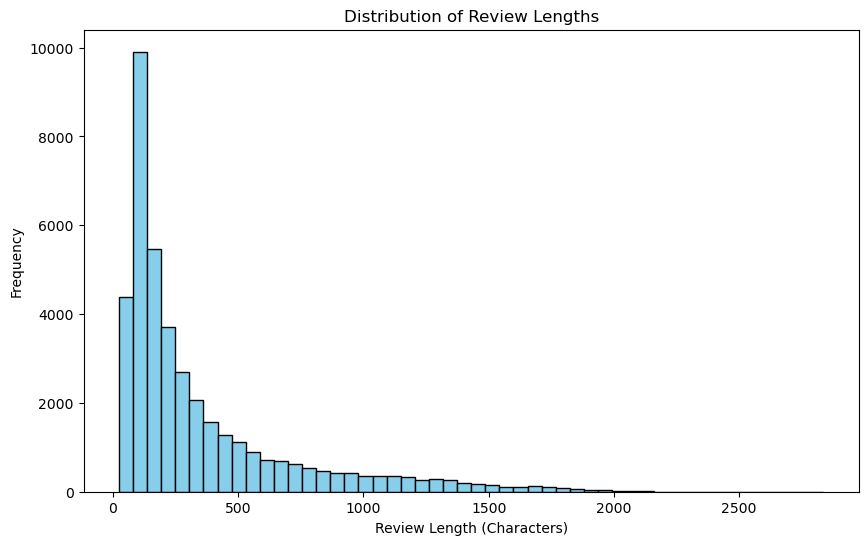

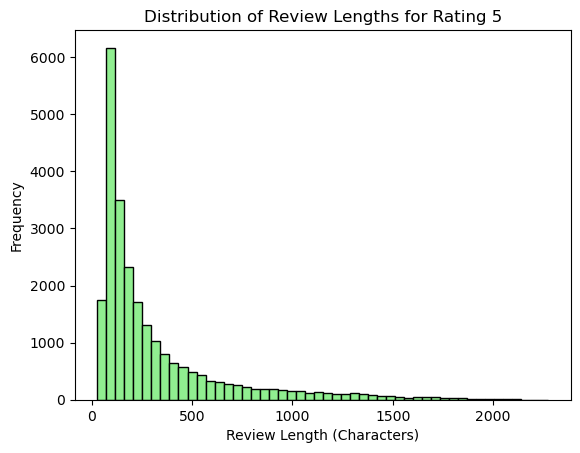

In [40]:
# Step 1: Add a new column for review length (in characters)
df['review_length'] = df['text_'].apply(len)

# Step 2: Visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Frequency')
plt.show()

# Optional: You can also check review lengths based on ratings or category
# Example: Reviews with rating 5 and their lengths
rating_5_reviews = df[df['rating'] == 5]
plt.hist(rating_5_reviews['review_length'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Review Lengths for Rating 5')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Frequency')
plt.show()

# Sentiment Analysis

Fake reviews often contain overly positive or overly negative sentiment without much detail. You can use sentiment analysis tools to measure the sentiment of each review. Extreme sentiment may indicate fake reviews, especially if it's unbalanced or overly enthusiastic without much context.

You can use a library like TextBlob or VADER to perform sentiment analysis:

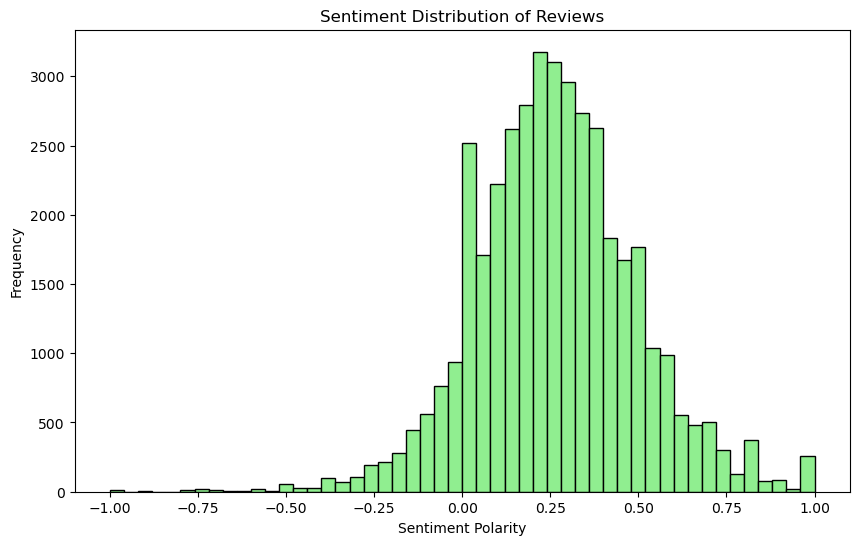

               category  rating label  \
10   Home_and_Kitchen_5       5    CG   
53   Home_and_Kitchen_5       5    CG   
65   Home_and_Kitchen_5       5    OR   
99   Home_and_Kitchen_5       5    OR   
186  Home_and_Kitchen_5       5    OR   

                                                 text_  review_length  \
10   As advertised. 5th one I've had. The only prob...             75   
53   Got these for the third time.  I have a small ...             80   
65    Like this little guy. Use it often. He is small.             48   
99   Works as expected for connecting CCTV power su...             62   
186  a nice secondary vacuum for small apartments a...             69   

     sentiment  
10   -0.050000  
53   -0.125000  
65   -0.218750  
99   -0.100000  
186  -0.027381  


In [42]:
from textblob import TextBlob

# Step 1: Create a new column for sentiment polarity (-1 to 1)
df['sentiment'] = df['text_'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 2: Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Step 3: Investigate potential mismatches (e.g., high rating with negative sentiment)
fake_like_real = df[(df['rating'] == 5) & (df['sentiment'] < 0)]
print(fake_like_real.head())  # Check first few mismatched reviews

## Vader method

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Birkir\AppData\Roaming\nltk_data...


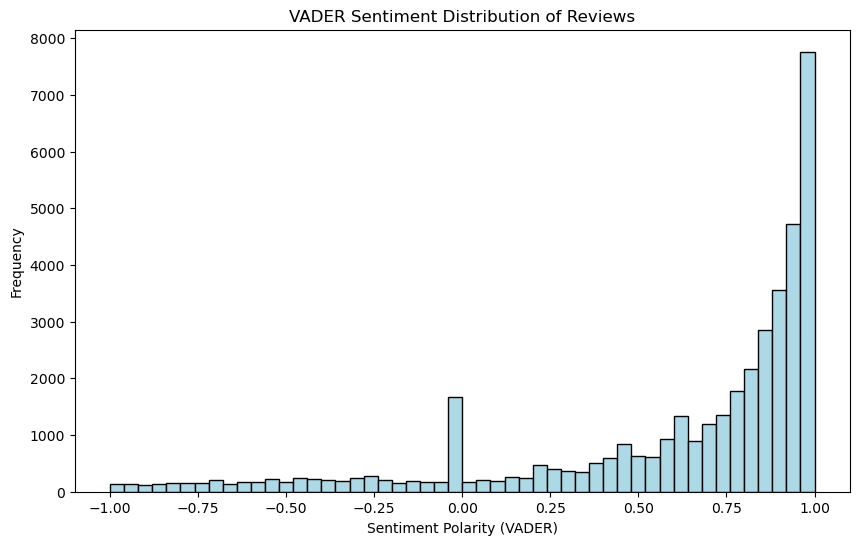

               category  rating label  \
10   Home_and_Kitchen_5       5    CG   
14   Home_and_Kitchen_5       5    CG   
24   Home_and_Kitchen_5       5    CG   
149  Home_and_Kitchen_5       5    CG   
175  Home_and_Kitchen_5       5    OR   

                                                 text_  review_length  \
10   As advertised. 5th one I've had. The only prob...             75   
14   Makes may tea with out stirring. The only prob...             82   
24   Supposed to come with extra hardware. The only...             88   
149  As far as little plastic, it's fine, but I'm n...             75   
175  Very flexible leading edge not quite as helpfu...             69   

     sentiment  sentiment_vader  
10   -0.050000          -0.4019  
14    0.102778          -0.5256  
24    0.001389          -0.4019  
149   0.019792          -0.5261  
175   0.200000          -0.0887  


In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Step 1: Apply VADER sentiment analysis
df['sentiment_vader'] = df['text_'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Step 2: Visualize VADER sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_vader'], bins=50, color='lightblue', edgecolor='black')
plt.title('VADER Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Polarity (VADER)')
plt.ylabel('Frequency')
plt.show()

# Step 3: Investigate potential mismatches (high rating with negative sentiment)
fake_like_real_vader = df[(df['rating'] == 5) & (df['sentiment_vader'] < 0)]
print(fake_like_real_vader.head())  # Check first few mismatched reviews


### Combining Review Length and Sentiment Analysis
You could combine these two features to identify potentially suspicious reviews:

1. Short reviews with extreme sentiment (e.g., very positive or negative) might be flagged for further investigation as potentially fake.
2. High ratings with negative sentiment are often inconsistent and might indicate a fake review

In [44]:
# Filter reviews that are unusually short and have extreme sentiment (either very positive or negative)
potential_fake_reviews = df[(df['review_length'] < 100) & ((df['sentiment'] > 0.8) | (df['sentiment'] < -0.8))]

# Display potential fake reviews
print(potential_fake_reviews.head())


               category  rating label  \
62   Home_and_Kitchen_5       5    OR   
68   Home_and_Kitchen_5       5    OR   
171  Home_and_Kitchen_5       5    OR   
174  Home_and_Kitchen_5       5    OR   
178  Home_and_Kitchen_5       5    OR   

                                                 text_  review_length  \
62   Excellent quality product. Perfect for my ccoz...             51   
68   frame was beautifully crafted and looks great ...             62   
171  I love these sheets!!!!  Goes great with my st...             55   
174  These are great!  Great space saver in our lau...             56   
178  excellent product if you are a side sleeper th...             59   

     sentiment  sentiment_vader  
62       1.000           0.8126  
68       0.825           0.8316  
171      0.900           0.8877  
174      1.000           0.8684  
178      1.000           0.8126  


In [45]:
df

,category,rating,label,text_,review_length,sentiment,sentiment_vader
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",75,0.473750,0.9593
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",80,0.558333,0.8910
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,67,0.250000,0.7906
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",81,0.400000,0.7463
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,85,0.740000,0.7397
...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4,OR,I had read some reviews saying that this bra r...,1698,0.190431,0.9941
40428,Clothing_Shoes_and_Jewelry_5,5,CG,I wasn't sure exactly what it would be. It is ...,1305,0.298208,0.9989
40429,Clothing_Shoes_and_Jewelry_5,2,OR,"You can wear the hood by itself, wear it with ...",2007,0.054640,0.2714
40430,Clothing_Shoes_and_Jewelry_5,1,CG,I liked nothing about this dress. The only rea...,1301,0.298997,0.9988


# Rating vs Sentiment mismatch

Fake reviews often have a high rating (like 5 stars) but may not have a corresponding positive sentiment (or vice versa). You can filter and investigate such mismatches.
Fake reviews might have extreme sentiment values (+1 or -1) without much context or explanation.

# Textual Patterns: Repetitive or Generic Phrases

Fake reviews often contain repeated phrases, generic language, or too-good-to-be-true descriptions. You can use Natural Language Processing (NLP) to identify text patterns that seem generic or repetitive. This could involve using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) to identify uncommon terms that might indicate fake patterns.

This will show you the most common bigrams or trigrams in the reviews, which might highlight repetitive or overly generic phrases that could suggest a fake review.

# Machine Learning for Fake Review Detection

If you want a more advanced approach, you can train a machine learning model to classify fake vs. genuine reviews. Here’s a general outline of how to proceed with text classification:

Data Preprocessing: Clean the text (lowercase, remove punctuation, tokenize).
Feature Extraction: Convert the text into numeric features using methods like TF-IDF or word embeddings.
Train a Model: Use algorithms like Logistic Regression, Random Forest, or Neural Networks to classify reviews as real or fake. You'll need a labeled dataset of real vs. fake reviews for training.

This is a basic approach to text classification where you train a model to classify reviews as "real" or "fake." The accuracy of the model depends on having a sufficiently labeled dataset.

# Use Pre-Trained models

You can also use pretrained models like BERT (Bidirectional Encoder Representations from Transformers), which has been shown to be highly effective at understanding the context of text and can be fine-tuned for specific tasks like fake review detection.

# Summary
To detect potentially fake reviews in your dataset, you can:

Analyze review length – Fake reviews tend to be short or too generic.
Use sentiment analysis – Check for extreme sentiments without much context.
Rating vs. sentiment mismatch – Fake reviews might show rating extremes with opposite sentiments.
Look for repetitive text – Use NLP techniques to identify common phrases.
Train a machine learning model – Build a classifier to identify fake reviews using labeled data.